In [250]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.datasets import load_svmlight_file
mem = Memory("./mycache")

@mem.cache
#load data
def get_data():
    data = load_svmlight_file("housing_scale.txt")
    return data[0], data[1]

X, y = get_data()
X = X.toarray()

#X = [X,1]
import numpy as np
addone= np.ones(X.shape[0])
X= np.column_stack((X,addone))

#divide data to traning part and validation part
from sklearn.model_selection import train_test_split
from numpy import random
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.22, random_state=25)

In [251]:
N = X_train.shape[1]
W_zeros = np.zeros(N)
W_random = random.random(size=N)
#use NumPy random.normal fuction to get datas in normal distribution 
W_normal = np.random.normal(size=N)

In [252]:
#Choose Least squared loss function
def cal_Loss(X,W,y):
    preY = np.dot(X,W)
    diifY = y - preY
    Loss = np.dot(diifY,diifY.T)/(2 * X.shape[0])
    return Loss
#Calculate the gradient
def cal_G(X,W,y):
    preY = np.dot(X,W)
    diifY = y - preY
    G = - np.dot(diifY,X)/ X.shape[0]
    return G

def draw_plot(Loss_train,Loss_validation):
    plt.plot(Loss_train,label="Loss_train")
    plt.plot(Loss_validation,label="Loss_validation")
    plt.legend()
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Linear regression")
    plt.show()

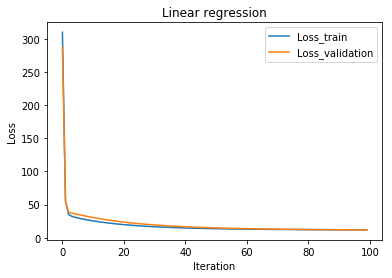

In [253]:
lr = 0.15
iteration = 100
W = W_normal
Loss_train = np.zeros(iteration)
Loss_validation = np.zeros(iteration)
for j in range(0,iteration):
    #the training loss
    Loss_train[j] = cal_Loss(X_train,W,y_train)
    #the gradient of the loss function
    G = cal_G(X_train,W,y_train)
    #the validation loss
    Loss_validation[j] = cal_Loss(X_validation,W,y_validation)
    #update the parameter W
    W = W - G * lr
#draw the result
draw_plot(Loss_train,Loss_validation)

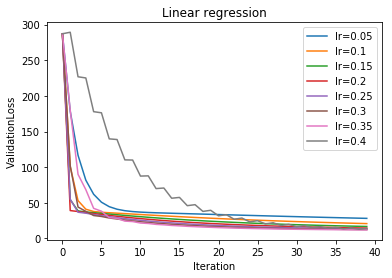

In [254]:
plt.close()
iteration = 40
#apply different learning rates
for lr in [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4]:
    W = W_normal
    Loss_train = np.zeros(iteration)
    Loss_validation = np.zeros(iteration)
    for j in range(0,iteration):
        #the training loss
        Loss_train[j] = cal_Loss(X_train,W,y_train)
        #the gradient of the loss function
        G = cal_G(X_train,W,y_train)
        #the validation loss
        Loss_validation[j] = cal_Loss(X_validation,W,y_validation)
        #update the parameter W
        W = W - G * lr
    lstr="lr="+ str(lr)   
    plt.plot(Loss_validation,label=lstr)
    plt.legend()
plt.title("Linear regression")
plt.xlabel("Iteration")
plt.ylabel("ValidationLoss")
plt.show()